# Spotify Data Exploration

## Purpose of Notebook
This notebook is an exploratory data analysis of my Spotify music library.  We aren't fitting any models here, just combing through the data to learn about it (and maybe learn a bit about myself). 


## Related Notebooks

1. [Data Retrieval](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-retrieval.ipynb) walks through collecting liked tracks using Spotipy as a Python wrapper for the Spotify API and attaching audio features to each track and storing in a dataframe.
2. **[Data Exploration](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-exploration.ipynb)** is an exploratory data analysis of my liked tracks
3. [Data Clustering](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-clustering.ipynb)  attempts to finds genres in my liked tracks using K-Means clustering from 


## Resources


# Exploratory Data Analysis

## I. Setup

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5, style="ticks")  # increase font size for readability

from IPython.display import IFrame  # for embedding Spotify player

In [2]:
df = pd.read_csv('data/saved-songs.csv')

Now let's subset our data frame to only the variables we are interested in for this exploratory data analysis:

In [3]:
df_audio = df[['popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key', 'duration_ms', 'time_signature', 'valence']]

## II. Exploring Audio Features

The Spotify API allows you to embed the Spotify player and play tracks.  So let's take a look (or really a listen) to some tracks!  

We will be forming clusters based on the following musical features that Spotify has for each song.  The main audio features we will explore are described in the [Audio Features Endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) and [Track Endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).  The first few audio features are fairly intuitive: `tempo`, `duration_ms`, `key`, `mode`:

+ `tempo` - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
+ `duration_ms` - The duration of the track in milliseconds.
+ `key` - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
+ `mode` - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Spotify provides some audio features that try to quantify various qualities of a song.  The API documentation gives a description for each below.  Many of the audio features are a combination of other musical elements -- e.g. `danceability` is a combination of tempo, rhythm stability, beat strength, and overall regularity.  How musical elements are combined and weighted is not given so we will need to get some intuitive sense of each audio feature somehow.

+ `popularity` - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
+ `acousticness` - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
+ `danceability` - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
+ `energy` - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
+ `instrumentalness` - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
+ `liveness` - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
+ `loudness` - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
+ `speechiness` - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
+ `valence` - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).




Let's first take a look at a pairs plot of the features in our data set using Seaborn's `pairplot` method, which produces a matrix of scatterplots of each variable against every other variable and plots the density of each variable on the diagonal. 

In [4]:
pd.set_option('mode.chained_assignment', None)
# First let's rename the levels of the 'key' categorical variable
df_audio["key"] = df_audio["key"].astype('category') # cast type int64 to type category
df_audio['key'] = df_audio['key'].cat.rename_categories({-1: 'No Key',
                               0: 'C', 
                               1: 'C♯', 
                               2: 'D',
                               3: 'D♯',
                               4: 'E',
                               5: 'F',
                               6: 'F♯',
                               7: 'G',
                               8: 'G♯',
                               9: 'A',
                               10: 'A♯',
                               11: 'B',})
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,acousticness,analysis_url,danceability,duration_ms,energy,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,Cubicolor,Fictionalise - Lindstrom & Prins Thomas Extend...,1m8BthDjfQS47iuULONgLi,12,0.0510,https://api.spotify.com/v1/audio-analysis/1m8B...,0.635,583263,0.829,...,0.113,-8.771,0,0.0415,116.989,4,https://api.spotify.com/v1/tracks/1m8BthDjfQS4...,audio_features,spotify:track:1m8BthDjfQS47iuULONgLi,0.6360
1,1,Cubicolor,Fictionalise - Lindstrom & Prins Thomas Remix,40X549muIHXIvWoj2S6MKb,16,0.1350,https://api.spotify.com/v1/audio-analysis/40X5...,0.616,312301,0.863,...,0.158,-10.520,0,0.0377,116.978,4,https://api.spotify.com/v1/tracks/40X549muIHXI...,audio_features,spotify:track:40X549muIHXIvWoj2S6MKb,0.5270
2,2,Cubicolor,Dead End Thrills - Patrice Bäumel Remix,3MEjDXwQWnDzqwRanBgFzm,37,0.2800,https://api.spotify.com/v1/audio-analysis/3MEj...,0.700,443661,0.673,...,0.102,-10.217,1,0.0374,122.008,3,https://api.spotify.com/v1/tracks/3MEjDXwQWnDz...,audio_features,spotify:track:3MEjDXwQWnDzqwRanBgFzm,0.1430
3,3,Cubicolor,Counterpart,2Jm5TBQziCdySQg2J7w0PN,33,0.4200,https://api.spotify.com/v1/audio-analysis/2Jm5...,0.361,314043,0.471,...,0.084,-12.726,1,0.0441,122.845,4,https://api.spotify.com/v1/tracks/2Jm5TBQziCdy...,audio_features,spotify:track:2Jm5TBQziCdySQg2J7w0PN,0.0392
4,4,Cubicolor,No Dancers,6NH78lyZkS05PotKqg0ZKw,45,0.0146,https://api.spotify.com/v1/audio-analysis/6NH7...,0.577,347717,0.853,...,0.249,-11.989,0,0.0384,119.988,4,https://api.spotify.com/v1/tracks/6NH78lyZkS05...,audio_features,spotify:track:6NH78lyZkS05PotKqg0ZKw,0.1400


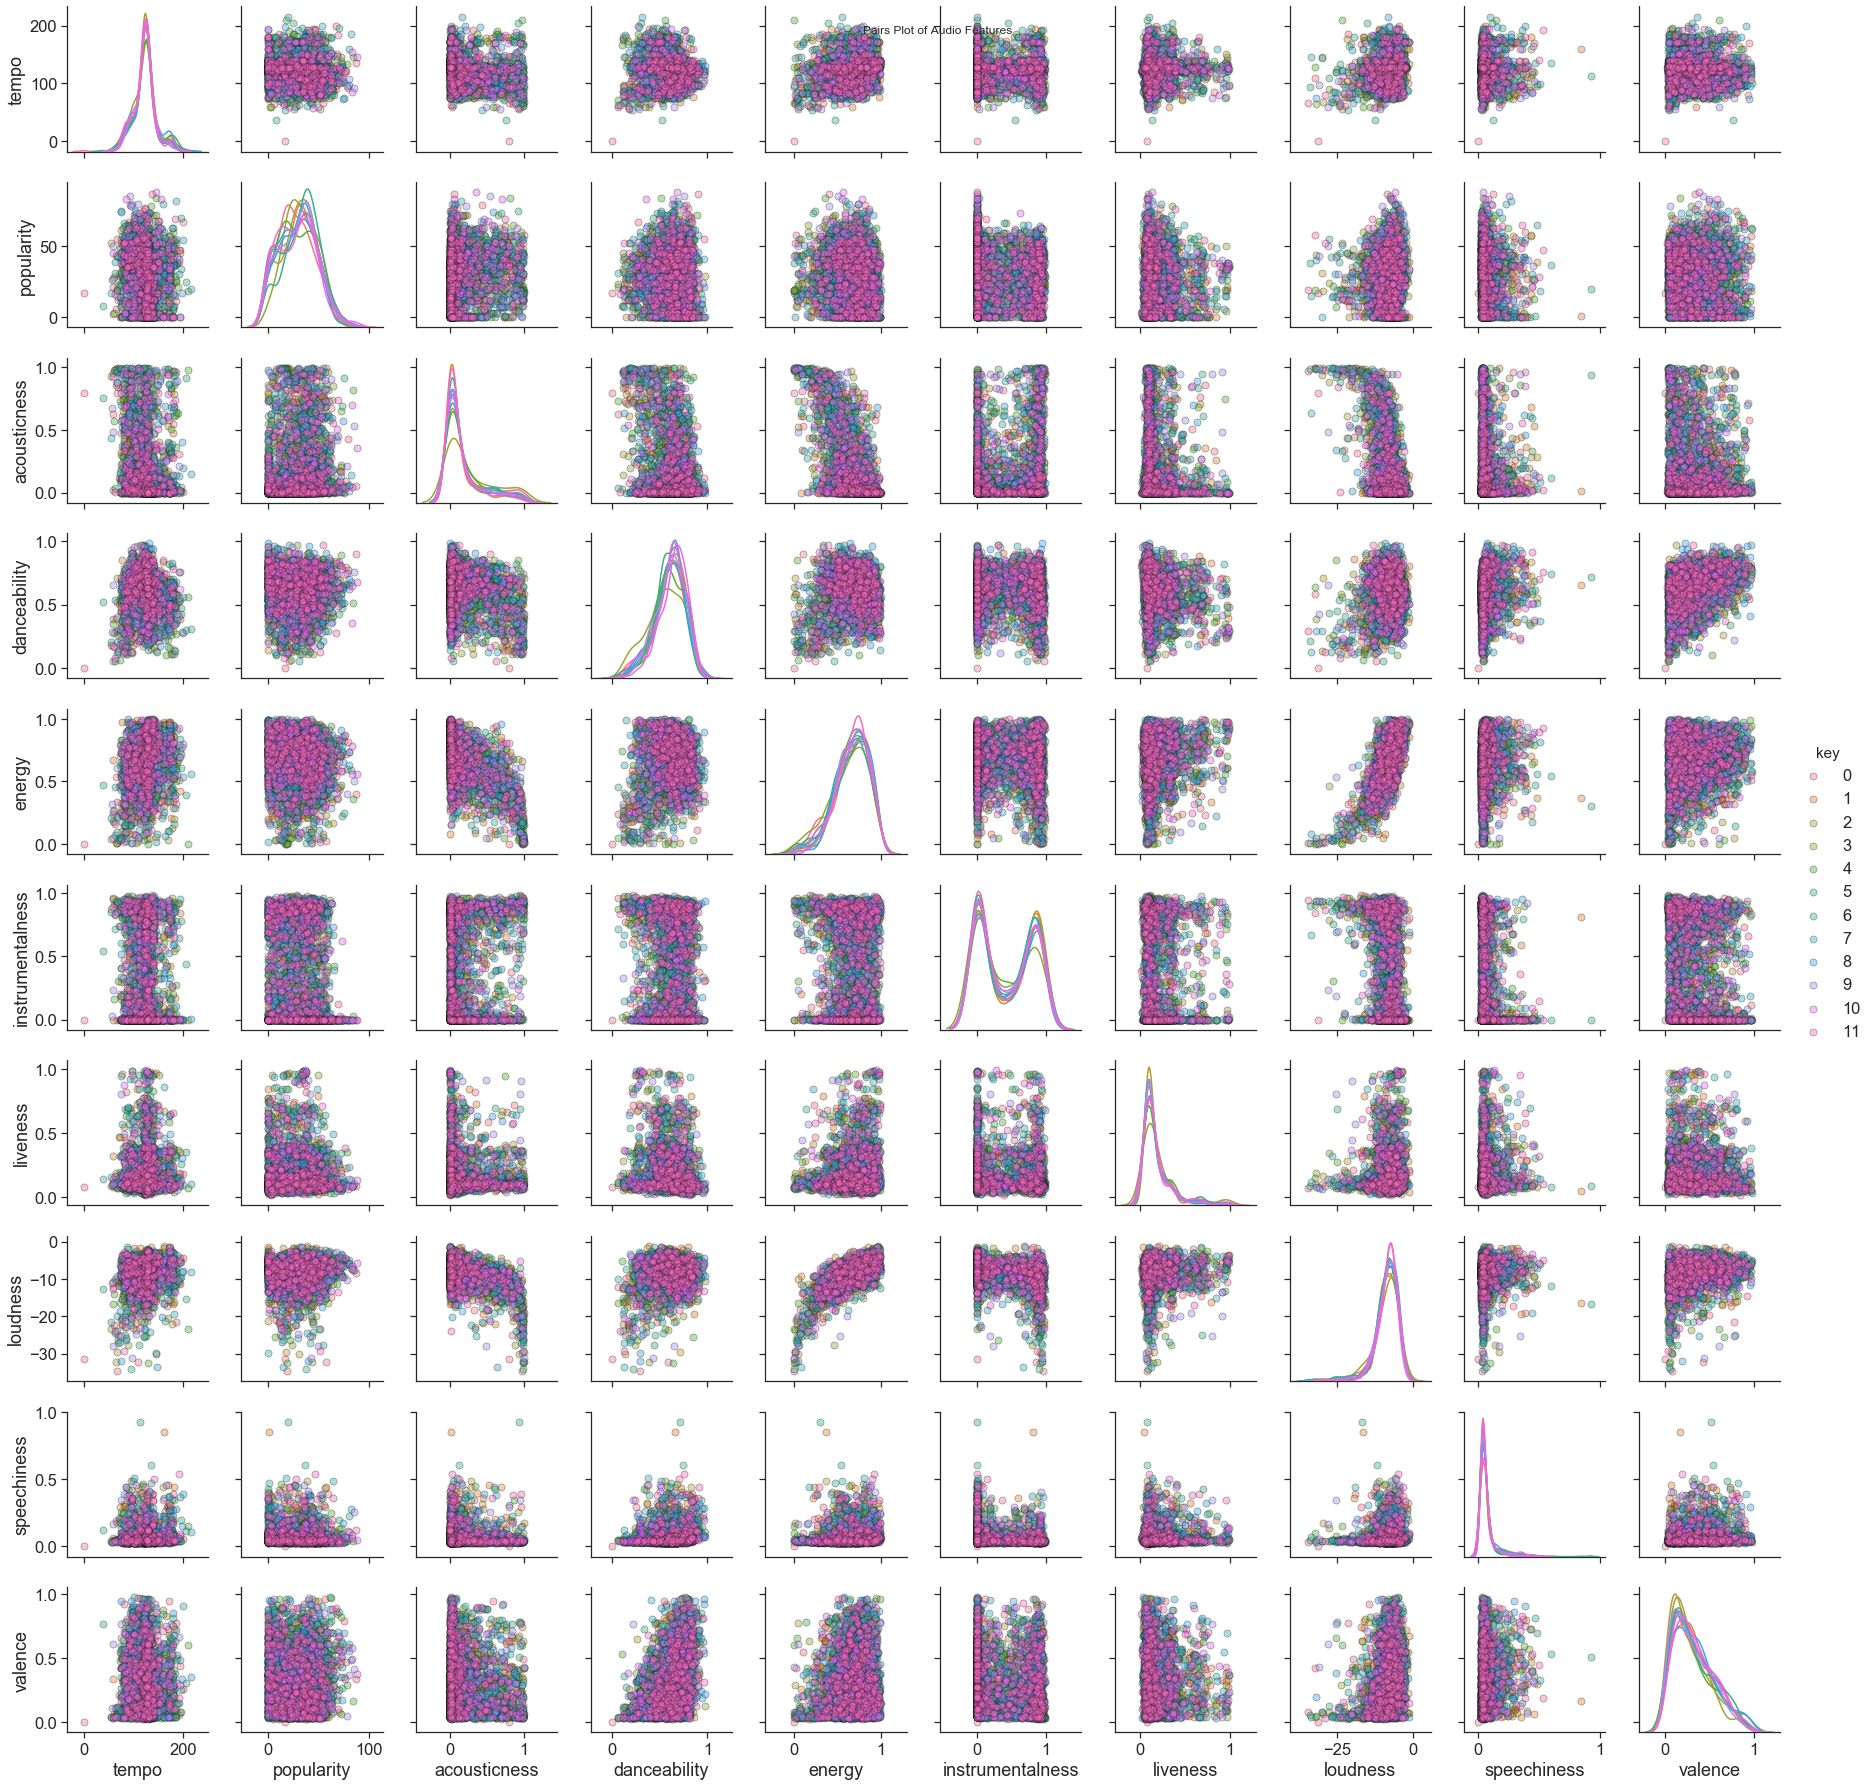

In [5]:
# Create pairsplot using seaborn with `key` as a factor
sns.pairplot(df, hue = 'key', 
             diag_kind = 'kde',
             diag_kws = dict(shade=False),
             plot_kws = {'alpha': 0.4, 's': 50, 'edgecolor': 'k'},
             vars=['tempo', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','valence']); 
#sns.plt.xlim(0, 1)
plt.suptitle('Pairs Plot of Audio Features');

From the pairs plot we immediately notice that most features are normally distributed with densities centered rather closely near the mean.  This makes sense because I tend to listen to a lot of electronic music and don't have many other genres saved to my Spotify library.  We do note that `acousticness`, `liveness`, `valence`, and to some extent `speechiness`, `loudness`, and `energy` are skewed.  

Also noteable is the bimodal density of `instrumentalness` with the two modes at about 0.25 (more vocals) and 0.7 (less vocals) and falling off fairly quickly.  This indicates that I generally listen to two types of music, which are likely where the "pop" with more vocals and "electronic" with less vocals.

Looking at `valence` we see something interesting.  The density is quite close to 0 and skews fairly linearly to the right.  A track with high valence sounds more positive, so it seems that I like tracks that sound less positive.  This could be an artifact of electronic music possibly sounding "less positive" than say pop music.  Though I will say that I have a number of "sad" playlists saved in my library.  

The pairs plot is grouped by the `key` of each track.  The distributions of each key in each feature is fairly similar except in `acousticness` where there are noticeably less tracks in the key of D.  

Thinking ahead to clustering, we don't see any clear clusters (other than a single cluster) in the data but we do see some skewness between features.  I tend to listen to similar songs, and while I do venture into new territory, I usually get there via known routes rather than jumping to something completely different -- as noted by the few outliers.  Determining genres based on clustering algorithms may prove difficult.  

# Listening to Audio Features

In [6]:
# Formatting for Spotify web players
from IPython.display import display, HTML
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

## I. Acousticness

> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

The feature `acousticness` doesn't measure acousticness directly, but rather a probability that the song is acoustic.  

In [7]:
df.sort_values(by='acousticness', inplace=True)
print("Min acousticness =", round(df['acousticness'].min(), 3), '\t', df.loc[df['acousticness'].idxmin(), 'artist_name'], "-", df.loc[df['acousticness'].idxmin(), 'track_name'])
print("Median acousticness =", round(df['acousticness'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max acousticness =", round(df['acousticness'].max(), 3), '\t', df.loc[df['acousticness'].idxmax(), 'artist_name'], "-", df.loc[df['acousticness'].idxmax(), 'track_name'])

Min acousticness = 0.0 	 Luttrell - Don’t Forget To Breathe (ABGTN2017)
Median acousticness = 0.04 	 Capital Cities - Drop Everything
Max acousticness = 0.995 	 Camille Saint-Saëns - Saint-Saëns: Le carnaval des animaux, R. 125: VI. Kangourous


In [8]:
# Tracks with the max, median, and min 'acousticness' value
df['acousticness'].max() # Highest confidence track is acoustic
max = df.loc[df['acousticness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['acousticness'].min() # Lowest confidence track is acoustic
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['acousticness'].min() # Lowest confidence track is acoustic
min = df.loc[df['acousticness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))


## II. Danceability

> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

Danceability is a blend of a few different musical elements.  It is a good metric for determining if the track will make someone want to dance or not.  However, for our purposes, it would be nice to have access to the elements that are blended into `danceability` because those are the elements that allow us to distinguish differences in the music.  

In [9]:
df.sort_values(by='danceability', inplace=True)
print("Min danceability =", round(df['danceability'].min(), 3), '\t', df.loc[df['danceability'].idxmin(), 'artist_name'], "-", df.loc[df['danceability'].idxmin(), 'track_name'])
print("Median danceability =", round(df['danceability'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max danceability =", round(df['danceability'].max(), 3), '\t', df.loc[df['danceability'].idxmax(), 'artist_name'], "-", df.loc[df['danceability'].idxmax(), 'track_name'])

Min danceability = 0.0 	 Lido - You Lost Your Keys
Median danceability = 0.624 	 il:lo - Kelele
Max danceability = 0.979 	 Tiësto - Always Near - (Extended Tiësto Beat Mix)


In [10]:
# Tracks with the max, median, and min 'danceability' value
df['danceability'].max() # Highest confidence track is danceability
max = df.loc[df['danceability'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['danceability'].min() # Lowest confidence track is danceability
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['danceability'].min() # Lowest confidence track is danceability
min = df.loc[df['danceability'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## III. Energy

> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Again, it would be nice to have access to the elements that are blended into `energy` because those elements would allow us to distinguish more subtle differences in tracks.

In [11]:
df.sort_values(by='energy', inplace=True)
print("Min energy =", round(df['energy'].min(), 3), '\t', df.loc[df['energy'].idxmin(), 'artist_name'], "-", df.loc[df['energy'].idxmin(), 'track_name'])
print("Median energy =", round(df['energy'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max energy =", round(df['energy'].max(), 3), '\t', df.loc[df['energy'].idxmax(), 'artist_name'], "-", df.loc[df['energy'].idxmax(), 'track_name'])

Min energy = 0.002 	 Camille Saint-Saëns - Saint-Saëns: Le carnaval des animaux, R. 125: VIII. Personnages à longues oreilles
Median energy = 0.694 	 ILLENIUM - With You (feat. Quinn XCII)
Max energy = 0.998 	 Ferry Corsten - A Slice of Heaven


In [12]:
# Tracks with the max and min 'energy' value
df['energy'].max() # Highest confidence track is energy
max = df.loc[df['energy'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['energy'].min() # Lowest confidence track is energy
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['energy'].min() # Lowest confidence track is energy
min = df.loc[df['energy'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## IV. Instrumentalness

> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

The `instrumentalness` is a probability of that a track as either having vocals or not having vocals.  

In [13]:
df.sort_values(by='instrumentalness', inplace=True)
print("Min instrumentalness =", round(df['instrumentalness'].min(), 3), '\t', df.loc[df['instrumentalness'].idxmin(), 'artist_name'], "-", df.loc[df['instrumentalness'].idxmin(), 'track_name'])
print("Median instrumentalness =", round(df['instrumentalness'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max instrumentalness =", round(df['instrumentalness'].max(), 3), '\t', df.loc[df['instrumentalness'].idxmax(), 'artist_name'], "-", df.loc[df['instrumentalness'].idxmax(), 'track_name'])

Min instrumentalness = 0.0 	 Camille Saint-Saëns - Saint-Saëns: Le carnaval des animaux, R. 125: VIII. Personnages à longues oreilles
Median instrumentalness = 0.391 	 GAMPER & DADONI - Oxas
Max instrumentalness = 0.989 	 Above & Beyond - Eternal


In [14]:
# Tracks with the max and min 'instrumentalness' value
df['instrumentalness'].max() # Highest confidence track is instrumentalness
max = df.loc[df['instrumentalness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['instrumentalness'].min() # Lowest confidence track is instrumentalness
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['instrumentalness'].min() # Lowest confidence track is instrumentalness
min = df.loc[df['instrumentalness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## V. Liveness

> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [15]:
df.sort_values(by='liveness', inplace=True)
print("Min liveness =", round(df['liveness'].min(), 3), '\t', df.loc[df['liveness'].idxmin(), 'artist_name'], "-", df.loc[df['liveness'].idxmin(), 'track_name'])
print("Median liveness =", round(df['liveness'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max liveness =", round(df['liveness'].max(), 3), '\t', df.loc[df['liveness'].idxmax(), 'artist_name'], "-", df.loc[df['liveness'].idxmax(), 'track_name'])

Min liveness = 0.016 	 Rough Cut - Get It
Median liveness = 0.117 	 Joe Goddard - Ordinary Madness - RAC Mix [Edit]
Max liveness = 0.992 	 Metallica - One - Live with the SFSO


In [16]:
# Tracks with the max and min 'liveness' value
df['liveness'].max() # Highest confidence track is liveness
max = df.loc[df['liveness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['liveness'].min() # Lowest confidence track is liveness
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['liveness'].min() # Lowest confidence track is liveness
min = df.loc[df['liveness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## VI. Loudness

> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

In [17]:
df.sort_values(by='loudness', inplace=True)
print("Min loudness =", round(df['loudness'].min(), 3), '\t', df.loc[df['loudness'].idxmin(), 'artist_name'], "-", df.loc[df['loudness'].idxmin(), 'track_name'])
print("Median loudness =", round(df['loudness'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max loudness =", round(df['loudness'].max(), 3), '\t', df.loc[df['loudness'].idxmax(), 'artist_name'], "-", df.loc[df['loudness'].idxmax(), 'track_name'])

Min loudness = -34.636 	 Camille Saint-Saëns - Saint-Saëns: Le carnaval des animaux, R. 125: IV. Tortues
Median loudness = -7.966 	 Bob Moses - Listen to Me
Max loudness = -1.171 	 Bassnectar - Chromatek


In [18]:
# Tracks with the max and min 'loudness' value
df['loudness'].max() # Highest confidence track is loudness
max = df.loc[df['loudness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['loudness'].min() # Lowest confidence track is loudness
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['loudness'].min() # Lowest confidence track is loudness
min = df.loc[df['loudness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## VII. Speechiness

> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Note how low the median value for `speechiness` is.  I don't listen to songs with many lyrics. 

In [19]:
df.sort_values(by='speechiness', inplace=True)
print("Min speechiness =", round(df['speechiness'].min(), 3), '\t', df.loc[df['speechiness'].idxmin(), 'artist_name'], "-", df.loc[df['speechiness'].idxmin(), 'track_name'])
print("Median speechiness =", round(df['speechiness'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max speechiness =", round(df['speechiness'].max(), 3), '\t', df.loc[df['speechiness'].idxmax(), 'artist_name'], "-", df.loc[df['speechiness'].idxmax(), 'track_name'])

Min speechiness = 0.0 	 Lido - You Lost Your Keys
Median speechiness = 0.048 	 Seven Lions - Without You My Love
Max speechiness = 0.926 	 Jon Benjamin - Jazz Daredevil - Deal With the Devil


In [20]:
# Tracks with the max and min 'speechiness' value
df['speechiness'].max() # Highest confidence track is speechiness
max = df.loc[df['speechiness'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['speechiness'].min() # Lowest confidence track is speechiness
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['speechiness'].min() # Lowest confidence track is speechiness
min = df.loc[df['speechiness'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

## VIII. Valence

> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

This audio feature seems to do it's job well.  At the time of writing this the highest valence track in my library is Kangaroo Court by Capital Cities, which is certainly one of the "happiest" tracks I've listened to. 

In [21]:
df.sort_values(by='valence', inplace=True)
print("Min valence =", round(df['valence'].min(), 3), '\t', df.loc[df['valence'].idxmin(), 'artist_name'], "-", df.loc[df['valence'].idxmin(), 'track_name'])
print("Median valence =", round(df['valence'].median(), 3), '\t', df.iloc[int(len(df)/2)]['artist_name'], "-", df.iloc[int(len(df)/2)]['track_name'])
print("Max valence =", round(df['valence'].max(), 3), '\t', df.loc[df['valence'].idxmax(), 'artist_name'], "-", df.loc[df['valence'].idxmax(), 'track_name'])

Min valence = 0.0 	 Lido - You Lost Your Keys
Median valence = 0.27 	 Hazem Beltagui - You Before Me
Max valence = 0.975 	 Capital Cities - Kangaroo Court


In [22]:
# Tracks with the max and min 'valence' value
df['valence'].max() # Highest confidence track is valence
max = df.loc[df['valence'].idxmax(), 'track_id']
url_max = "https://open.spotify.com/embed/track/" + max

df['valence'].min() # Lowest confidence track is valence
median =  df.iloc[int(len(df)/2)]['track_id']
url_median = "https://open.spotify.com/embed/track/" + median

df['valence'].min() # Lowest confidence track is valence
min = df.loc[df['valence'].idxmin(), 'track_id']
url_min = "https://open.spotify.com/embed/track/" + min

display(IFrame(src=url_min, width=300, height=80))
display(IFrame(src=url_median, width=300, height=80))
display(IFrame(src=url_max, width=300, height=80))

# What's Next?

Now that we have explored our data a bit in part 3 we will try to find some clusters in the data and make playlists from them. 

1. [Data Retrieval](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-retrieval.ipynb) walks through collecting liked tracks using Spotipy as a Python wrapper for the Spotify API and attaching audio features to each track and storing in a dataframe.
2. [Data Exploration](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-exploration.ipynb) is an exploratory data analysis of my liked tracks
3. **[Data Clustering](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-clustering.ipynb)**  attempts to finds genres in my liked tracks using K-Means clustering
